In [ ]:
One Class SVM(OC-SVM)
-Jan 27, 2020

We all know that SVM has been a very popular approach for non-linear classification problems. However, in problem statements, where there is only one class, like in unsupervised outlier detection, the current approach needs to be altered.

One Class SVM, which is a modified version of SVM came as a savior.

The solution for OC-SVM is basically derived from the solution of SVDD(Support Vector Data Description).

In SVDD, we try to map all the data points in higher dimensional feature space, ɸ, and then try to use a hyper-sphere such that most of the data lie inside it.

If the distance of the data point from center c > R = outlier
If the distance of the data point from center c < R = inlier
If the distance of the data point from center c = R = support vectors

In [2]:
#import libraries 
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.utils.example import visualize

In [3]:
#generate dataset
X_train,X_test, y_train,y_test = generate_data(n_train=500, n_test=100, n_features=2,behaviour = 'new')


In [4]:
#initialize detector
clf = OCSVM(nu=0.9, gamma=0.5,kernel = 'rbf') 
clf.fit(X_train)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma=0.5,
   kernel='rbf', max_iter=-1, nu=0.9, shrinking=True, tol=0.001,
   verbose=False)

In [5]:
# binary labels
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test) 

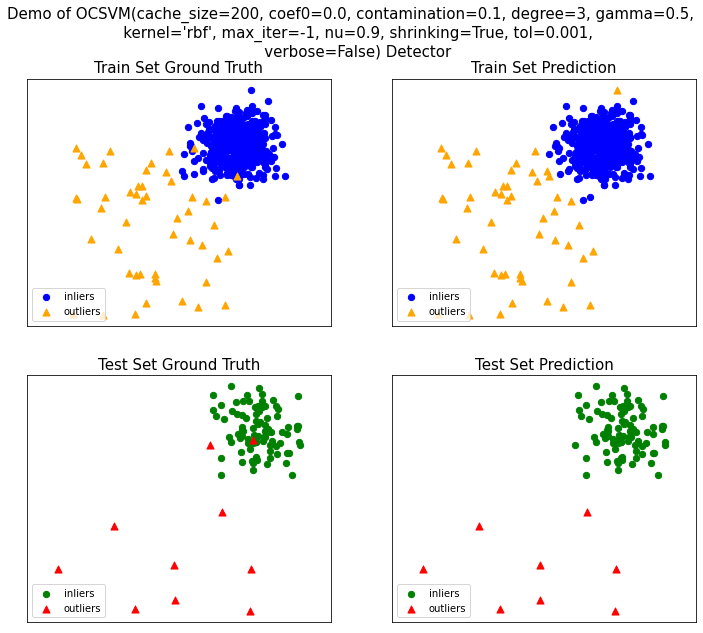

In [6]:
# prediction visualization
visualize(clf,X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
    show_figure=True,
    save_figure=False,)

https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

# 2.7. Novelty and Outlier Detection

In [ ]:
2.7. Novelty and Outlier Detection
2.7.1. Overview of outlier detection methods
2.7.2. Novelty Detection
2.7.3. Outlier Detection
2.7.4. Novelty detection with Local Outlier Factor

# sklearn.svm.OneClassSVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

### Examples using sklearn.svm.OneClassSVM

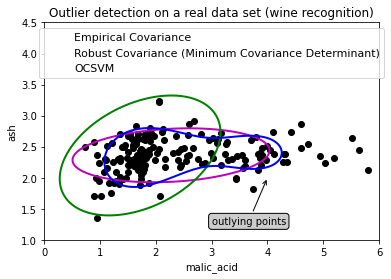

In [7]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = load_wine()["data"][:, [1, 2]]  # two clusters

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()


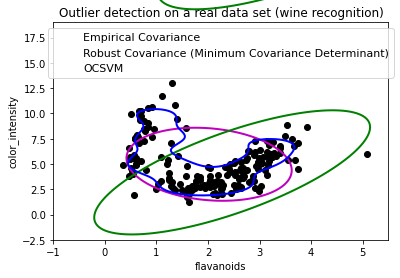

In [8]:
# Get data
X2 = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color="black")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend(
    (
        legend2_values_list[0].collections[0],
        legend2_values_list[1].collections[0],
        legend2_values_list[2].collections[0],
    ),
    (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()
